In [1]:
#Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
#Importing Evaluation Matrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
#Importing Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#Loading the Data_set
data_set = pd.read_csv("datatraining.csv")
test1 = pd.read_csv("datatest.csv")
test2 = pd.read_csv("datatest2.csv")

In [21]:
#Checking data_set features
data_set.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [22]:
data_set.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8138,2/10/2015 9:29,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2/10/2015 9:29,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2/10/2015 9:30,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2/10/2015 9:32,21.10,36.2600,433.0,820.333333,0.005621,1
8142,2/10/2015 9:33,21.10,36.2000,447.0,821.000000,0.005612,1


In [23]:
#Checking for null values
data_set.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

###### No null values in the whole dataset

In [24]:
#Checking for data_set info
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


###### All the feature include target are numeric expect date column we can droop it

In [25]:
#data_set = data_set.drop("date",axis=1)

In [26]:
#Checking for statistical characteristics between the features
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,8143.0,20.619084,1.016916,19.000000,19.700000,20.390000,21.390000,23.180000
Humidity,8143.0,25.731507,5.531211,16.745000,20.200000,26.222500,30.533333,39.117500
Light,8143.0,119.519375,194.755805,0.000000,0.000000,0.000000,256.375000,1546.333333
CO2,8143.0,606.546243,314.320877,412.750000,439.000000,453.500000,638.833333,2028.500000
HumidityRatio,8143.0,0.003863,0.000852,0.002674,0.003078,0.003801,0.004352,0.006476
Occupancy,8143.0,0.212330,0.408982,0.000000,0.000000,0.000000,0.000000,1.000000


In [27]:
#Checking for correlation beetween the features
data_set.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


###### As we see from the above correlation table Humidity and HumidityRation has High Correlation and  Temperature and Humidy has very low correlation 

<AxesSubplot:>

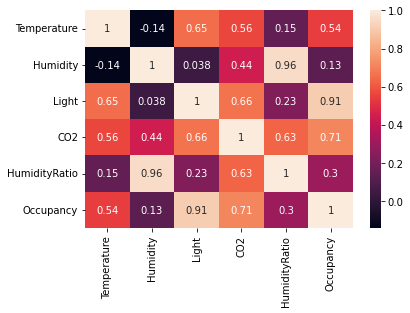

In [28]:
#fig,ax = plt.subplot(figsize(30,14))
sns.heatmap(data_set.corr(),annot=True)

In [29]:
#Knowing the number of target
data_set["Occupancy"].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

<AxesSubplot:xlabel='Occupancy', ylabel='count'>

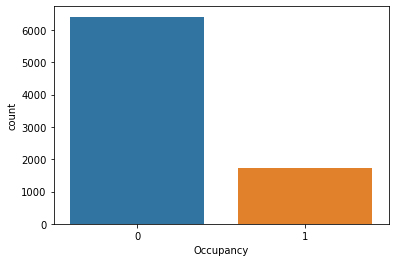

In [30]:
sns.countplot("Occupancy",data=data_set)

###### Room Occupied is very large comparing to not occupied

<AxesSubplot:xlabel='Temperature', ylabel='count'>

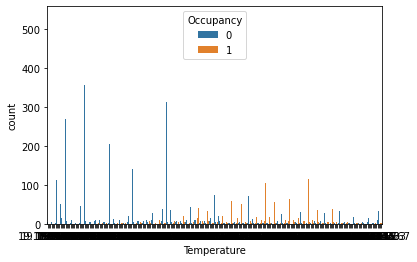

In [31]:
#Let compare the temperature and the Occupancy of the room
sns.countplot("Temperature",data=data_set,hue="Occupancy")

In [32]:
data_set["date"].value_counts()

2/4/2015 17:51    2
2/6/2015 11:38    2
2/6/2015 11:23    2
2/6/2015 11:25    2
2/9/2015 2:25     2
                 ..
2/6/2015 21:30    1
2/6/2015 21:28    1
2/6/2015 21:27    1
2/6/2015 21:26    1
2/10/2015 9:33    1
Name: date, Length: 6514, dtype: int64

In [34]:
#Spliting the data into target and features and dropping date columns
x = data_set.drop(["date","Occupancy"],axis=1)
y = data_set["Occupancy"]

##### Feature Scalling

In [36]:
#First lets split our data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [37]:
x_train.shape,x_test.shape

((6514, 5), (1629, 5))

In [38]:
#Scaling the features
SC = StandardScaler()

In [39]:
x_train_prep = SC.fit_transform(x_train)
x_test_prep = SC.transform(x_test)

In [40]:
x_train_prep

array([[-0.2231558 , -0.80503936, -0.60428943, -0.5190808 , -0.84118562],
       [ 1.26080306,  0.24693222, -0.60428943, -0.18004773,  0.63345438],
       [-0.90577687, -1.1490576 , -0.60428943, -0.51694516, -1.31446972],
       ...,
       [ 0.66721951, -0.89466516, -0.60428943, -0.10796983, -0.72074743],
       [-0.81673934, -1.16716383, -0.60428943, -0.51801298, -1.31312333],
       [ 0.73317324, -1.31020299,  0.81922317, -0.47209669, -1.13040826]])

In [41]:
x_test_prep

array([[ 0.4297861 , -0.05272578, -0.60428943, -0.49558875,  0.07022262],
       [ 1.4685573 ,  0.25598533, -0.60428943, -0.0855456 ,  0.7103933 ],
       [-0.51005451, -1.21967187, -0.60428943, -0.52441991, -1.29992057],
       ...,
       [ 0.19729921, -1.03860964, -0.56809843, -0.5316277 , -0.97374947],
       [-0.34434577, -1.18029084,  1.46376762, -0.43071864, -1.22834131],
       [ 1.51802259, -0.94807852,  2.26513972,  0.59358837, -0.5708276 ]])

######  Now all the test and train feature are successfully scale so let conver them to pandas DataFrame

In [42]:
x_train_prep = pd.DataFrame(x_train_prep,columns=x_train.columns)
x_test_prep = pd.DataFrame(x_test_prep,columns=x_test.columns)

#### MODELLING

In [43]:
models = [RandomForestClassifier(),SVC(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]

In [45]:
#Checking for test score for the whole Algorithm
for model in models:
    model.fit(x_train_prep,y_train)
    test_score = model.score(x_test_prep,y_test)
    print("The test Score for ",model,"=",test_score)

The test Score for  RandomForestClassifier() = 0.994475138121547
The test Score for  SVC() = 0.9858809085328423
The test Score for  LogisticRegression() = 0.9834254143646409
The test Score for  KNeighborsClassifier() = 0.9914057704112953
The test Score for  DecisionTreeClassifier() = 0.9914057704112953


In [47]:
#Checking for test score for the whole Algorithm
for model in models:
    model.fit(x_train_prep,y_train)
    test_score = model.score(x_train_prep,y_train)
    print("The test Score for ",model,"=",test_score)

The test Score for  RandomForestClassifier() = 1.0
The test Score for  SVC() = 0.9895609456555112
The test Score for  LogisticRegression() = 0.986644151059257
The test Score for  KNeighborsClassifier() = 0.9955480503530857
The test Score for  DecisionTreeClassifier() = 1.0


###### All the model perfoam well both in the train and test set lets perfoam predicton 

In [49]:
for model in models:
    model.fit(x_train_prep,y_train)
    prediction = model.predict(x_test_prep)
    Acc_score = accuracy_score(prediction,y_test)
    print("The Accuracy Score for ",model,"=",Acc_score)

The Accuracy Score for  RandomForestClassifier() = 0.9932473910374463
The Accuracy Score for  SVC() = 0.9858809085328423
The Accuracy Score for  LogisticRegression() = 0.9834254143646409
The Accuracy Score for  KNeighborsClassifier() = 0.9914057704112953
The Accuracy Score for  DecisionTreeClassifier() = 0.9920196439533456


###### Let's take two models to perfoam HyperParameter tunnig to see if we can increse the score

##### Improving Support Vector Classifier

In [50]:
S_VC = SVC()

In [51]:
params_grid = {'C':[0.001,10,100,1000],
              'gamma':[1,0.1,0.01,0.001], 
                'degree':[2,3,4,5],
              'coef0':[0,1,2,4]
              
              }

In [53]:
GRD_1 = GridSearchCV(S_VC,param_grid=params_grid,cv=5,verbose=2)

In [55]:
GRD_1.fit(x_train_prep,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   1.2s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   1.2s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   1.2s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   1.2s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   1.2s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   1.2s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   1.2s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   1.2s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   1.2s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   1.3s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   1.4s
[CV] END .............C=0.001, coef0=0, degre

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 10, 100, 1000], 'coef0': [0, 1, 2, 4],
                         'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [56]:
GRD_1.best_params_

{'C': 1000, 'coef0': 0, 'degree': 2, 'gamma': 1}

In [57]:
GRD_1.best_score_

0.9947800950895547

In [58]:
SVC_P = GRD_1.best_estimator_

In [59]:
SVC_P.fit(x_train_prep,y_train)

SVC(C=1000, coef0=0, degree=2, gamma=1)

In [60]:
predic_svc = SVC_P.predict(x_test_prep)

In [61]:
accuracy_score(y_test,predic_svc)

0.9932473910374463

In [62]:
confusion_matrix(y_test,predic_svc)

array([[1252,    5],
       [   6,  366]], dtype=int64)

In [63]:
print(classification_report(y_test,predic_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       0.99      0.98      0.99       372

    accuracy                           0.99      1629
   macro avg       0.99      0.99      0.99      1629
weighted avg       0.99      0.99      0.99      1629



In [66]:
drop = ["date","Occupancy"]

In [101]:
test1d = test1.drop(drop,axis=1)

In [116]:
test1d_scal = SC.fit_transform(test1d)

In [117]:
test1d_scal = pd.DataFrame(test1d_scal,columns=test1d.columns)

In [118]:
test1d_scal.shape

(2665, 5)

In [119]:
test1d_scal.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.204762,0.376814,1.566862,0.106940,1.207540
1,2.222275,0.384202,1.539680,0.145214,1.221461
2,2.233950,0.359575,1.516762,0.176881,1.209162
3,2.226653,0.316478,1.201302,0.194253,1.174139
4,2.257300,0.347262,1.180715,0.208776,1.211522


In [120]:
test1_test = SVC_P.predict(test1d_scal)

In [121]:
test1_test = pd.DataFrame(test1_test)

In [124]:
test1_test.head()

,0
0,1
1,1
2,1
3,1
4,1


In [125]:
Prediiction_1 = pd.DataFrame({"Date":test1["date"],
                             "Occupancy":test1_test[0]})

In [127]:
Prediiction_1.to_csv("Prediiction_1.csv",index=False)

In [87]:
test2d = test2.drop(drop,axis=1)

In [128]:
test2d_scal = SC.transform(test2d)

In [129]:
test2d_scal = pd.DataFrame(test2d_scal,columns=test2d.columns)

In [130]:
test2_test = SVC_P.predict(test2d_scal)

In [131]:
test2d_scal.shape

(9752, 5)

In [132]:
test2d_scal.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.317293,2.372119,0.975783,1.065385,1.628286
1,0.346481,2.317394,0.975783,0.964004,1.607925
2,0.324590,2.367673,0.962459,0.976819,1.629201
3,0.324590,2.367673,0.982445,0.996469,1.629201
4,0.346481,2.372119,0.975783,0.983369,1.643500


In [133]:
test2_test = pd.DataFrame(test2_test)

In [134]:
Prediiction_2 = pd.DataFrame({"Date":test2["date"],
                             "Occupancy":test2_test[0]})

In [135]:
Prediiction_2.to_csv("Prediiction_2.csv",index=False)

In [95]:
TT = SC.fit_transform(test1d)

In [96]:
TT = pd.DataFrame(TT,columns=test1d.columns)

In [97]:
for model in models:
    model.fit(x_train_prep,y_train)
    prediction1 = model.predict(TT)
    Acc_score = accuracy_score(test1["Occupancy"],prediction1)
    print("The Accuracy Score for ",model,"=",Acc_score)

The Accuracy Score for  RandomForestClassifier() = 0.925703564727955
The Accuracy Score for  SVC() = 0.9771106941838649
The Accuracy Score for  LogisticRegression() = 0.8848030018761726
The Accuracy Score for  KNeighborsClassifier() = 0.9590994371482177
The Accuracy Score for  DecisionTreeClassifier() = 0.9354596622889306
